# Import Needed Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load The Dataset

In [64]:
df = pd.read_csv("Traffic_Incidents.csv")
df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y
0,6092800325,04/12/2024 06:52:08,مركبه عطلانه في الشارع - بسيط,25.093147,55.224763
1,6092807449,04/12/2024 07:00:49,اصطدام بين عدة مركبات - بسيط,25.238056,55.375553
2,6092811837,04/12/2024 07:06:07,مركبه عطلانه في الشارع - بسيط,25.235238,55.379331
3,6092814352,04/12/2024 07:09:24,الوقوف خلف المركبات (دبل بارك) - بسيط,25.168128,55.401353
4,6092819890,04/12/2024 07:16:50,صدم حاجز - بسيط,25.093972,55.161972


# Exploring The Data
# A scatter plot to show the location of the accidents.

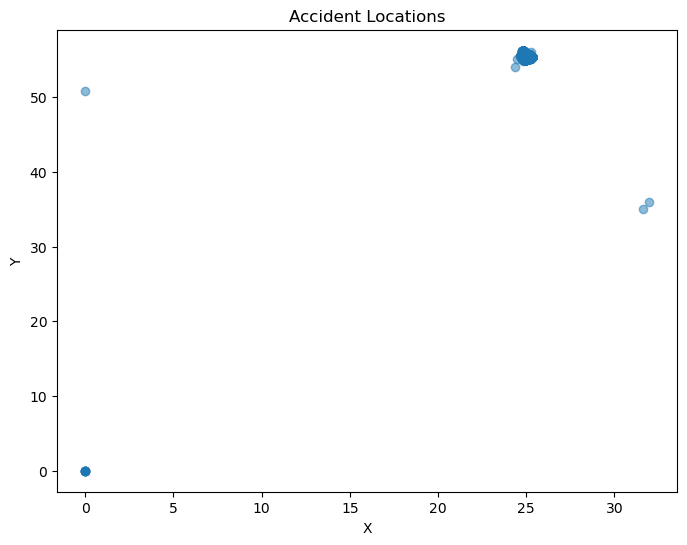

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(df['acci_x'], df['acci_y'], alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Accident Locations')
plt.show()

# A pie chart to show the different types of accidents, as we can see we have many types.

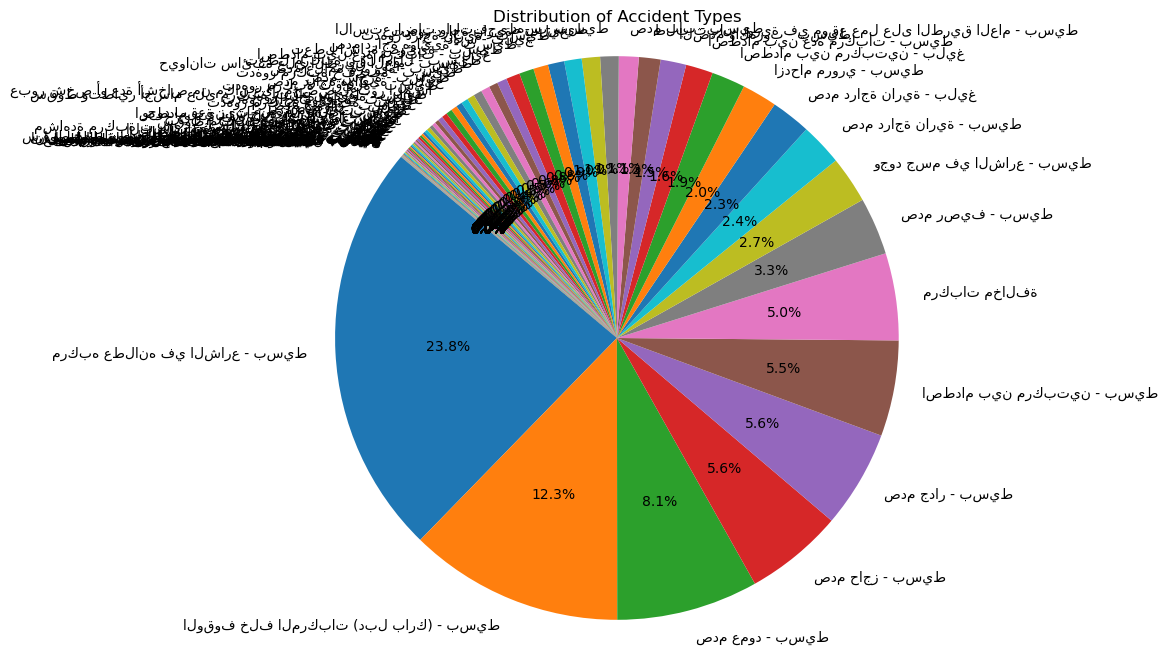

In [68]:
accident_counts = df['acci_name'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(accident_counts, labels=accident_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Accident Types')
plt.show()

# Data Preprocessing and Cleaning
# Lets use label encoder to encode the accident types, it basically gives a number to each accident type, this will make it easier for the machine learning model.

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['acci_name_encoded'] = label_encoder.fit_transform(df['acci_name'])
df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y,acci_name_encoded
0,6092800325,04/12/2024 06:52:08,مركبه عطلانه في الشارع - بسيط,25.093147,55.224763,86
1,6092807449,04/12/2024 07:00:49,اصطدام بين عدة مركبات - بسيط,25.238056,55.375553,9
2,6092811837,04/12/2024 07:06:07,مركبه عطلانه في الشارع - بسيط,25.235238,55.379331,86
3,6092814352,04/12/2024 07:09:24,الوقوف خلف المركبات (دبل بارك) - بسيط,25.168128,55.401353,17
4,6092819890,04/12/2024 07:16:50,صدم حاجز - بسيط,25.093972,55.161972,58


# Since we have feature related to time called 'acci_time', lets make more use of it, using the function pd.to_datetime we can extract the hour, day and weekday that the accident occured in.

In [72]:
df['acci_time'] = pd.to_datetime(df['acci_time'], format="%d/%m/%Y %H:%M:%S")
df['hour'] = df['acci_time'].dt.hour
df['day'] = df['acci_time'].dt.day
df['weekday'] = df['acci_time'].dt.weekday
df.head()

,acci_id,acci_time,acci_name,acci_x,acci_y,acci_name_encoded,hour,day,weekday
0,6092800325,2024-12-04 06:52:08,مركبه عطلانه في الشارع - بسيط,25.093147,55.224763,86,6,4,2
1,6092807449,2024-12-04 07:00:49,اصطدام بين عدة مركبات - بسيط,25.238056,55.375553,9,7,4,2
2,6092811837,2024-12-04 07:06:07,مركبه عطلانه في الشارع - بسيط,25.235238,55.379331,86,7,4,2
3,6092814352,2024-12-04 07:09:24,الوقوف خلف المركبات (دبل بارك) - بسيط,25.168128,55.401353,17,7,4,2
4,6092819890,2024-12-04 07:16:50,صدم حاجز - بسيط,25.093972,55.161972,58,7,4,2


# Now we will take the new features we need and our target features which are the X and Y coordinates.

In [74]:
X = df[['hour', 'day', 'weekday', 'acci_name_encoded']]
y = df[['acci_x', 'acci_y']]

# We will split the data into training and testing, we will use 80/20 split, so 80% training data and 20% testing data.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning
# First Model: Decision Tree For Regression
# In regression, decision trees predict continuous values by splitting data into groups and using the mean value of each group as the prediction.

# Here we are fitting the training data to the decision tree regressor model, we will set the maximum depth to only 3.

In [79]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)
DT_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

# Testing the decision tree.

In [81]:
y_pred = DT_regressor.predict(X_test)

# Evaluate the model.

In [83]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The RMSE and the R2 scores of the model are: {}, {}".format(rmse, r2))

The RMSE and the R2 scores of the model are: 0.7201758147322104, 0.00015929602334274762


# Display sample of the predicted coordinates and the actual ones.

In [85]:
print("\nSample Predictions:")
print("Predicted:", y_pred[:5])
print("Actual:", y_test[:5].values)


Sample Predictions:
Predicted: [[25.16470547 55.3105111 ]
 [25.19197763 55.30816595]
 [25.16470547 55.3105111 ]
 [25.19197763 55.30816595]
 [25.13416574 55.27642399]]
Actual: [[25.271944   55.351665  ]
 [25.19195493 55.24616759]
 [25.27085897 55.33078815]
 [25.25925797 55.28788776]
 [25.07109    55.21736   ]]


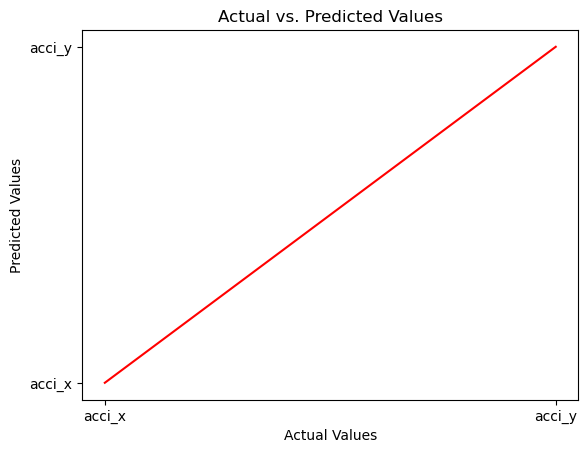

In [86]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [87]:
# Assuming X_test corresponds to a subset of df, and y_pred is for X_test
df_test = df.iloc[X_test.index]  # Get the rows of df that correspond to X_test

# Add predicted values to df_test
df_test['predicted_x'] = [coord[0] for coord in y_pred]  # Extract x from each pair
df_test['predicted_y'] = [coord[1] for coord in y_pred]  # Extract y from each pair

C:\Users\yassir\AppData\Local\Temp\ipykernel_9944\3882878756.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_x'] = [coord[0] for coord in y_pred]  # Extract x from each pair
C:\Users\yassir\AppData\Local\Temp\ipykernel_9944\3882878756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_y'] = [coord[1] for coord in y_pred]  # Extract y from each pair


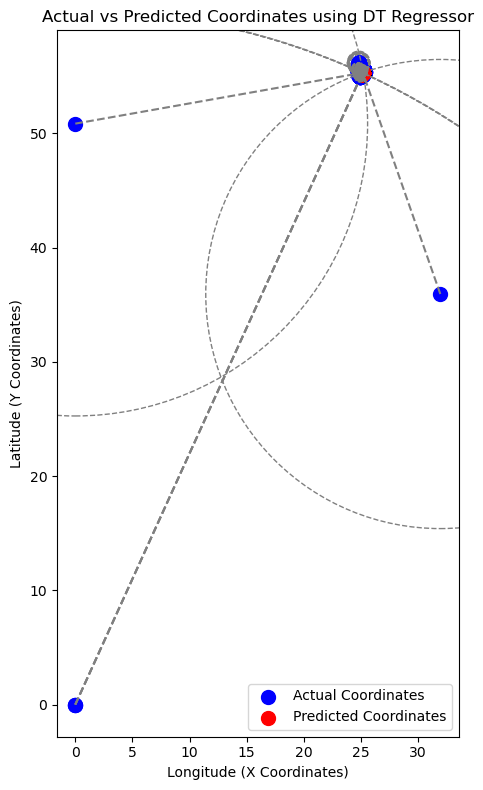

In [111]:
distances = np.sqrt((df_test['acci_x'] - df_test['predicted_x'])**2 +
                    (df_test['acci_y'] - df_test['predicted_y'])**2)

plt.figure(figsize=(12, 8))

plt.scatter(df_test['acci_x'], df_test['acci_y'], color='blue', label='Actual Coordinates', s=100)

plt.scatter(df_test['predicted_x'], df_test['predicted_y'], color='red', label='Predicted Coordinates', s=100)

for i in range(len(df_test)):
    plt.plot([df_test['acci_x'].iloc[i], df_test['predicted_x'].iloc[i]],
             [df_test['acci_y'].iloc[i], df_test['predicted_y'].iloc[i]],
             color='grey', linestyle='--')
    circle = plt.Circle((df_test['acci_x'].iloc[i], df_test['acci_y'].iloc[i]), distances.iloc[i], color='grey', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

plt.title('Actual vs Predicted Coordinates using DT Regressor')
plt.xlabel('Longitude (X Coordinates)')
plt.ylabel('Latitude (Y Coordinates)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Second Model: Random Forests For Regression
# Random forests basically is a group of decision trees. It combines the outputs of multiple decision trees and aggregate them.

# Again here we are fitting the training data to the Random Forests Regressor Model.

In [91]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(random_state = 42)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Testing the Random Forests.

In [93]:
y_pred = RF_regressor.predict(X_test)

# Evaluate the model.

In [95]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The RMSE and the R2 scores of the model are: {}, {}".format(rmse, r2))

The RMSE and the R2 scores of the model are: 0.7624444611453969, -0.11630229371031442


# Display sample of the predicted coordinates and the actual ones.

In [97]:
print("\nSample Predictions:")
print("Predicted:", y_pred[:5])
print("Actual:", y_test[:5].values)


Sample Predictions:
Predicted: [[25.18626408 55.28684284]
 [25.16585684 55.28164792]
 [25.12936687 55.23312388]
 [25.18630041 55.24084152]
 [25.09466228 55.17887616]]
Actual: [[25.271944   55.351665  ]
 [25.19195493 55.24616759]
 [25.27085897 55.33078815]
 [25.25925797 55.28788776]
 [25.07109    55.21736   ]]


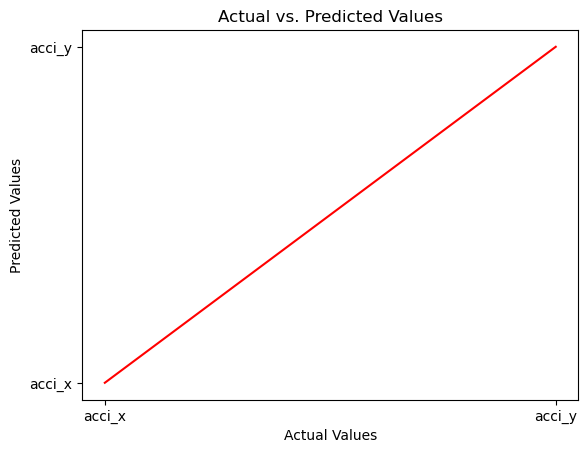

In [98]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

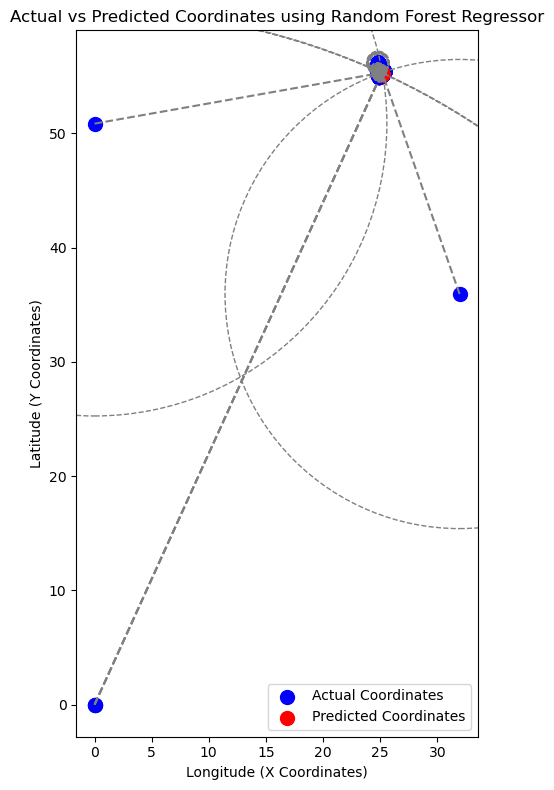

In [113]:
distances = np.sqrt((df_test['acci_x'] - df_test['predicted_x'])**2 +
                    (df_test['acci_y'] - df_test['predicted_y'])**2)

plt.figure(figsize=(12, 8))

plt.scatter(df_test['acci_x'], df_test['acci_y'], color='blue', label='Actual Coordinates', s=100)

plt.scatter(df_test['predicted_x'], df_test['predicted_y'], color='red', label='Predicted Coordinates', s=100)

for i in range(len(df_test)):
    plt.plot([df_test['acci_x'].iloc[i], df_test['predicted_x'].iloc[i]],
             [df_test['acci_y'].iloc[i], df_test['predicted_y'].iloc[i]],
             color='grey', linestyle='--')
    circle = plt.Circle((df_test['acci_x'].iloc[i], df_test['acci_y'].iloc[i]), distances.iloc[i], color='grey', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

plt.title('Actual vs Predicted Coordinates using Random Forest Regressor')
plt.xlabel('Longitude (X Coordinates)')
plt.ylabel('Latitude (Y Coordinates)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Third Model: Linear Regression
# Linear Regression is similar to Logistic Regression but it is used for predicting continuous varibles which is more suitable to our case as we are predicting coordinates.

# Here we are fitting the Linear Regression model to the training data.

In [102]:
from sklearn.linear_model import LinearRegression
LR_regressor = LinearRegression()
LR_regressor.fit(X_train, y_train)

LinearRegression()

# Testing the Linear Regression.

In [104]:
y_pred = LR_regressor.predict(X_test)

# Evaluate the model.

In [106]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The RMSE and the R2 scores of the model are: {}, {}".format(rmse, r2))

The RMSE and the R2 scores of the model are: 0.7201776058547676, 2.8056448405200385e-05


# Display sample of the predicted coordinates and the actual ones.

In [108]:
print("\nSample Predictions:")
print("Predicted:", y_pred[:5])
print("Actual:", y_test[:5].values)


Sample Predictions:
Predicted: [[25.1572189  55.2866722 ]
 [25.16352351 55.29914752]
 [25.15814495 55.2925091 ]
 [25.16212688 55.29143869]
 [25.1510971  55.28809858]]
Actual: [[25.271944   55.351665  ]
 [25.19195493 55.24616759]
 [25.27085897 55.33078815]
 [25.25925797 55.28788776]
 [25.07109    55.21736   ]]


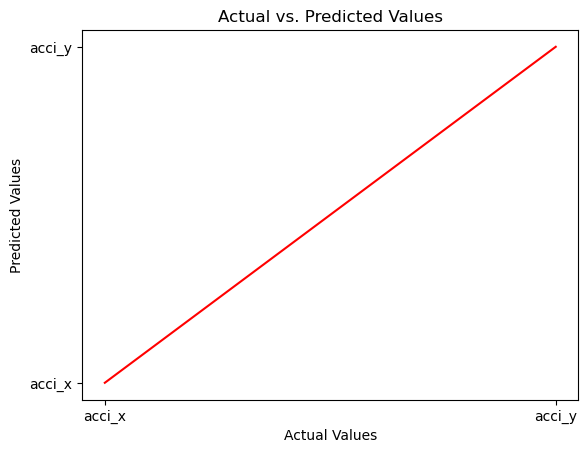

In [109]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

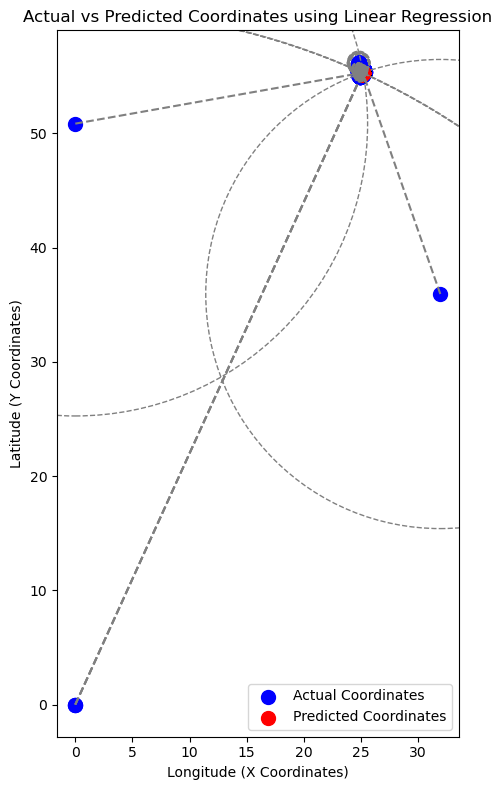

In [112]:
distances = np.sqrt((df_test['acci_x'] - df_test['predicted_x'])**2 +
                    (df_test['acci_y'] - df_test['predicted_y'])**2)

plt.figure(figsize=(12, 8))

plt.scatter(df_test['acci_x'], df_test['acci_y'], color='blue', label='Actual Coordinates', s=100)

plt.scatter(df_test['predicted_x'], df_test['predicted_y'], color='red', label='Predicted Coordinates', s=100)

for i in range(len(df_test)):
    plt.plot([df_test['acci_x'].iloc[i], df_test['predicted_x'].iloc[i]],
             [df_test['acci_y'].iloc[i], df_test['predicted_y'].iloc[i]],
             color='grey', linestyle='--')
    circle = plt.Circle((df_test['acci_x'].iloc[i], df_test['acci_y'].iloc[i]), distances.iloc[i], color='grey', fill=False, linestyle='--')
    plt.gca().add_artist(circle)

plt.title('Actual vs Predicted Coordinates using Linear Regression')
plt.xlabel('Longitude (X Coordinates)')
plt.ylabel('Latitude (Y Coordinates)')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

# Machine Learning With Normalization and Rounding
# We will try the same models but with rounding the coordinates and normalizing the non-target features to see if we get better results.

In [ ]:
df['acci_x'] = df['acci_x'].round(2)
df['acci_y'] = df['acci_y'].round(2)
df.head()

In [ ]:
X = df[['hour', 'day', 'weekday', 'acci_name_encoded']]
y = df[['acci_x', 'acci_y']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
DT_regressor = DecisionTreeRegressor(max_depth = 3, random_state = 42)
DT_regressor.fit(X_train_scaled, y_train)
y_pred = DT_regressor.predict(X_test_scaled)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The RMSE and the R2 scores of the model are: {}, {}".format(rmse, r2))

In [ ]:
print("\nSample Predictions:")
print("Predicted:", y_pred[:5])
print("Actual:", y_test[:5].values)